# Ghouls, Goblins and Ghosts 

## Table of Content

1. [Introduction](#section1)</br>
    - 1.1 [Problem Statement](#section101)</br>
2. [Data loading and description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Dimensionality Reduction](#section4)<br>
5. [Data Visualtization](#section5)<br> 
6. [Modelling and Prediction](#section6)<br>
     - 6.1 [Model 1: Logistic Regression](#section601)<br>
     - 6.2 [Model 2: Linear Discriminant Analysis (LDA)](#section602)<br>
     - 6.3 [Computing time difference between the different models created](#section603)<br>
7. [Applying KNN, SVM and Decision Tree and comparing using accuracy score](#section7)<br>
     - 7.1 [Model 3: Applying KNN](#section701)<br>
     - 7.2 [Model 4: SVM](#section702)<br>
     - 7.3 [Model 5: Decision Tree](#section703)<br>
8. [Conclusion](#section8)

<a id=section1></a>
## 1. Introduction

<p> Ghouls, Goblins, and Ghosts... Boo!. These are the monsters haunting our data sets. During Halloween, miniature ghosts, ghouls, and goblins ring our doorbell. But each of the three freaky frights has a different history and personality.</p>

<a id=section101></a>
### 1.1 Problem Statement

<p> To use **bone length measurements**, **severity of rot**, **extent of soullessness**, and **other characteristics** features to categorize them as Ghouls or Goblin or Ghosts.</p>

<a id=section2></a>
## 2. Data Loading and description

#### Importing Packages

In [1]:
# Import the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from collections import Counter
import time


from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

#### Load the Data Set

In [2]:
Train_data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv')
Test_data=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv')


<a id=section3></a>
## 3. Exploratory Data Analysis 

In [3]:
shape_train=Train_data.shape
print(shape_train)

(371, 7)


In [4]:
shape_test=Test_data.shape
print(shape_test)

(529, 6)


In [5]:
Train_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [6]:
Test_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,453.584121,0.425474,0.503637,0.517288,0.464096
std,257.804948,0.136079,0.158552,0.171727,0.179659
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.329383,0.393987,0.388189,0.338964
50%,445.000000,0.421989,0.510065,0.520220,0.461294
75%,670.000000,0.519024,0.605957,0.644824,0.584448
max,899.000000,1.000000,1.000000,0.999841,1.000000


In [7]:
Train_data.head(15)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [8]:
Test_data.head(15)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
5,14,0.292890,0.505851,0.297927,0.106263,white
6,15,0.584456,0.551680,0.628330,0.499118,white
7,16,0.485525,0.459242,0.657735,0.565337,blue
8,17,0.471757,0.407916,0.465992,0.406608,blue
9,18,0.572953,0.316454,0.668388,0.640692,clear


In [9]:
Test_data.tail(15)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
514,880,0.561184,0.278331,0.699267,0.554676,clear
515,881,0.555242,0.332323,0.634296,0.709737,black
516,882,0.351923,0.293618,0.540671,0.796418,clear
517,883,0.401179,0.346881,0.573723,0.417728,white
518,884,0.497556,0.336481,0.476596,0.505696,clear
519,885,0.344760,0.760489,0.315305,0.299874,white
520,887,0.497335,0.603658,0.800747,0.711493,blue
521,888,0.650289,0.340660,0.611360,0.499269,white
522,891,0.487516,0.456795,0.691251,0.687419,green
523,892,0.602629,0.732498,0.627519,0.815008,white


In [10]:
Train_data.tail(15)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
356,851,0.445547,0.241139,0.558614,0.399302,green,Goblin
357,855,0.434891,0.667160,0.798618,0.460061,green,Ghoul
358,858,0.440432,0.309498,0.203057,0.194105,clear,Ghost
359,861,0.626017,0.172182,0.408422,0.644941,blue,Ghoul
360,864,0.467785,0.420135,0.631894,0.386509,clear,Ghoul
361,867,0.501022,0.584847,0.656230,0.469886,clear,Ghoul
362,873,0.377449,0.466158,0.497351,0.393305,clear,Goblin
363,874,0.507583,0.799623,0.334520,0.344403,white,Ghost
364,877,0.486744,0.462666,0.840013,0.353383,clear,Goblin
365,878,0.406062,0.449944,0.788983,0.428553,white,Ghoul


In [11]:
np.sort(Train_data['color'].unique())

array(['black', 'blood', 'blue', 'clear', 'green', 'white'], dtype=object)

In [12]:
np.sort(Test_data['color'].unique())

array(['black', 'blood', 'blue', 'clear', 'green', 'white'], dtype=object)

In [13]:
np.sort(Train_data['type'].unique())

array(['Ghost', 'Ghoul', 'Goblin'], dtype=object)

In [14]:
Test_data.isnull()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


<a id=section4></a>
## 4. Dimensionality Reduction

In [15]:
Train_data.drop(['color'],axis=1,inplace=True)

In [16]:
Test_data.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

In [17]:
Train_data.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
type             0
dtype: int64

<a id=section5></a>
## 5. Data Visualization

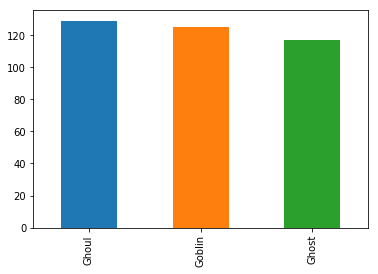

In [18]:
Train_data['type'].value_counts().head(10).plot.bar()

The box plot shows that Ghouls has highest values compared to Goblin and Ghost.

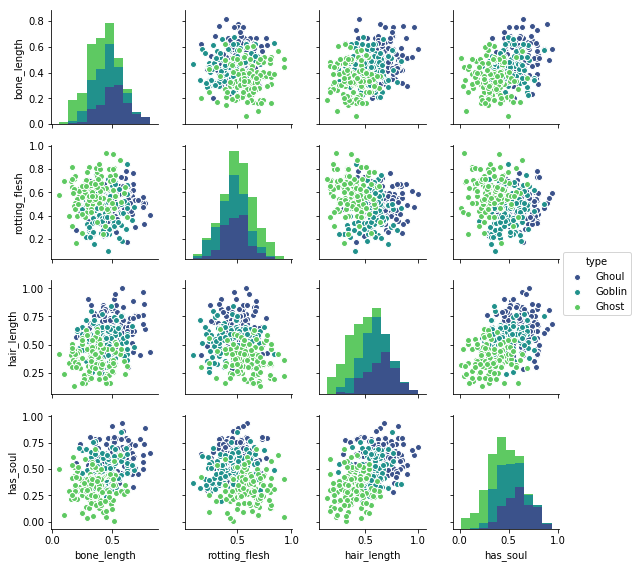

In [19]:
sns.pairplot(Train_data.drop('id', axis=1), hue="type",palette="viridis", size=2)

The values of all the columns are scattered and not isolated.

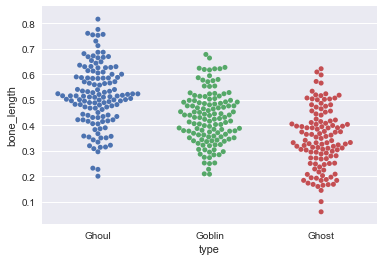

In [20]:
sns.set()
sns.swarmplot(x="type", y="bone_length",data=Train_data)

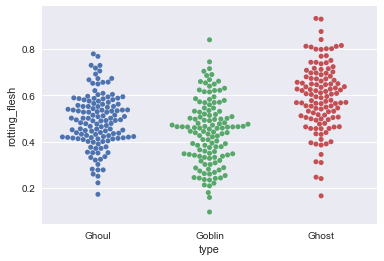

In [21]:
sns.set()
sns.swarmplot(x="type", y="rotting_flesh",data=Train_data)

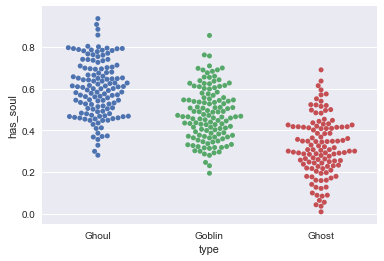

In [22]:
sns.set()
sns.swarmplot(x="type", y="has_soul",data=Train_data)

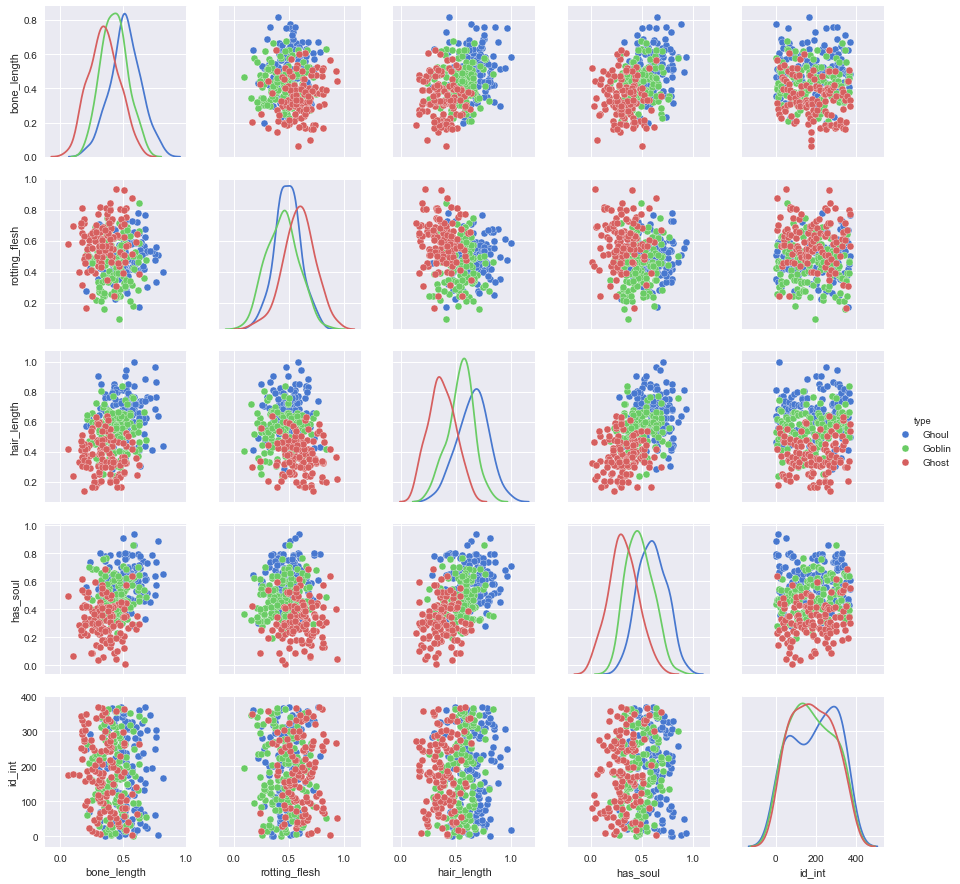

In [23]:
id_le = preprocessing.LabelEncoder()
id_le.fit(Train_data['id'])
Train_data['id_int'] = id_le.transform(Train_data['id'])

_ = sns.pairplot(Train_data.drop('id', axis = 1), hue = 'type', palette = 'muted', diag_kind='kde')

Train_data.drop('id_int', axis = 1, inplace = True)

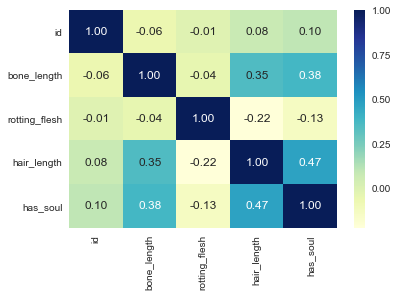

In [24]:
_ = sns.heatmap(Train_data.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

The column 'rotting_flesh' has negative values with other columns. The columns 'bone_length', 'hair_length' and 'has_soul' has positive values.

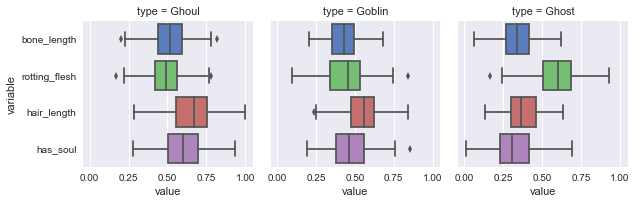

In [55]:
g = sns.FacetGrid(pd.melt(Train_data, id_vars='type', value_vars = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']), col = 'type')
g = g.map(sns.boxplot, 'value', 'variable', palette = 'muted')

The 'rotting_flesh' column has outliers with different creatures.

<a id=section6></a>
## 6. Modelling and Prediction 

<a id=section601></a>
### 6.1 Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(Train_data.drop('type', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(df, Train_data['type'], test_size = 0.30, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit1 = classifier.fit(X_train_sc, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.015626907348632812


In [29]:
y_pred = fit1.predict(X_test_sc)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(matrix)
print(report)

[[35  1  5]
 [ 0 32  3]
 [ 4 15 17]]
             precision    recall  f1-score   support

      Ghost       0.90      0.85      0.88        41
      Ghoul       0.67      0.91      0.77        35
     Goblin       0.68      0.47      0.56        36

avg / total       0.76      0.75      0.74       112



In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7589285714285714


<a id=section602></a>
### 6.2 Model 2: Linear Discriminant Analysis(LDA)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', solver='sag', C=1)
start_time = time.time()
fit2 = classifier.fit(X_train, y_train)
end_time = time.time()
time3 = end_time-start_time
print(time3)

0.015621423721313477


In [33]:
y_pred = fit2.predict(X_test)

#### Confusion Matrix and Classification Report

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[36  1  4]
 [ 0 32  3]
 [ 4 15 17]]
             precision    recall  f1-score   support

      Ghost       0.90      0.88      0.89        41
      Ghoul       0.67      0.91      0.77        35
     Goblin       0.71      0.47      0.57        36

avg / total       0.77      0.76      0.75       112



In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7589285714285714


<b>Applying LDA and then performing Logistic Regression gives the same accuracy score of 76%.<b>

<a id=section603></a>
### 6.3 Computing time difference between two different logistic regression models created

In [35]:
time_diff = time3/time2
print(time_diff)

0.999649090687172


<a id=section7></a>
## 7. Applying KNN, SVM and Decision Tree and comparing using accuracy score

#### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Train_data['type'], test_size = 0.3, random_state = 0)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
lda = LDA(n_components = 3,solver='eigen',shrinkage='auto')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

<a id=section701></a>
### 7.1 Model 3 : Performing KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [40]:
pred = knn.predict(X_test)

<b> Choosing the best K </b>

In [41]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

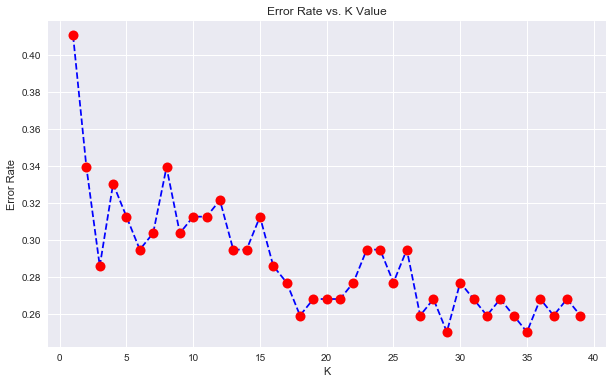

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<b> Report </b>

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[30  1 10]
 [ 0 27  8]
 [ 2 15 19]]
             precision    recall  f1-score   support

      Ghost       0.94      0.73      0.82        41
      Ghoul       0.63      0.77      0.69        35
     Goblin       0.51      0.53      0.52        36

avg / total       0.70      0.68      0.68       112



### Model Evaluation using accuracy score.

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.6785714285714286


<b> The accuracy score after applying KNN is 68% <b>

<a id=section702></a>
### 7.2 Model 4 : SVM

#### Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df, Train_data['type'], test_size = 0.3, random_state = 0)

<b> Applying LDA </b>

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 3,solver='svd')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [47]:
from sklearn.svm import SVC
model = SVC(C=100,kernel = 'rbf')
model.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
predictions = model.predict(X_test)

<b> Report </b>

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[30  0 11]
 [ 0 32  3]
 [ 2 10 24]]
             precision    recall  f1-score   support

      Ghost       0.94      0.73      0.82        41
      Ghoul       0.76      0.91      0.83        35
     Goblin       0.63      0.67      0.65        36

avg / total       0.78      0.77      0.77       112



In [50]:
print(accuracy_score(y_test, predictions))

0.7678571428571429


<b> The accuracy score with SVM is 77% <b>

<a id=section703></a>
### 7.4 Model 5 : Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier as DTC
dt = DTC(criterion='entropy',splitter='random')
tree = dt.fit(X_train,y_train)
pred_t = dt.predict(X_test)
cm = confusion_matrix(y_test,pred_t)
cr = classification_report(y_test,pred_t)
print(cm)
print(cr)

[[25  2 14]
 [ 0 20 15]
 [ 2 11 23]]
             precision    recall  f1-score   support

      Ghost       0.93      0.61      0.74        41
      Ghoul       0.61      0.57      0.59        35
     Goblin       0.44      0.64      0.52        36

avg / total       0.67      0.61      0.62       112



In [52]:
print(accuracy_score(y_test, pred_t))

0.6071428571428571


<b> The accuracy score with Decision Tree is 61%. <b>

<a id=section8></a>
# 8. Conclusion 
From this we can see that the best algorithm to classify whether it is a ghoul, goblin or ghost is **LDA** followed by **Logistic Regression** and **SVM**.